In [40]:
# import libraries
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as tst 
import datetime as dt

In [2]:
# retrieved csv file from https://data.townofcary.org/explore/dataset/cpd-crash-incidents/export/?disjunctive.rdfeature&disjunctive.rdcharacter&disjunctive.rdclass&disjunctive.rdconfigur&disjunctive.rdsurface&disjunctive.rdcondition&disjunctive.lightcond&disjunctive.weather&disjunctive.trafcontrl&disjunctive.contributing_factor&disjunctive.vehicle_type&sort=crash_date&refine.year=2023
# restricting exploration and analysis to only crashes in cary in 2023.
file_location = '/Users/trevorfingland/Documents/cpd-crash-incidents-full.csv'
df_full_crash = pd.read_csv(file_location)
df_full_crash.head()

,tamainid,Location Description,Road Feature,Road Character,Road Class,Road Configuration,Road Surface,Road Conditions,Light Condition,Weather,...,TA_Date,TA_Time,Crash Date/Time,Geo_Location,Crash Date - Year,Fatalities,Injuries,Month,Contributing Factor(s),Vehicle Type
0,38229,.14 MILES FROM RDU CENTER DR,NO SPECIAL FEATURE,"STRAIGHT,LEVEL",LOCAL STREET,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",SMOOTH ASPHALT,DRY,DARK - LIGHTED ROADWAY,CLOUDY,...,2019-01-02,6:54:20 PM,2019-01-02T18:54:20-05:00,NaN,2019,No,Yes,1,"NONE,NONE","PASSENGER CAR,PASSENGER CAR"
1,38230,100 FEET FROM PVA 100 WHITE BLUFF LN,"DRIVEWAY, PUBLIC","STRAIGHT,GRADE",PUBLIC VEHICULAR AREA,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,...,2019-01-02,4:19:01 PM,2019-01-02T16:19:01-05:00,NaN,2019,No,No,1,"NONE,NONE",PASSENGER CAR
2,38236,148 FEET FROM SR 3977 (SE CARY PKWY),NO SPECIAL FEATURE,"STRAIGHT,LEVEL",STATE SECONDARY ROUTE,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",SMOOTH ASPHALT,WET,DARK - UNKNOWN LIGHTING,RAIN,...,2019-01-03,4:45:21 AM,2019-01-03T04:45:21-05:00,NaN,2019,No,No,1,"NONE,NONE",PASSENGER CAR
3,38244,.05 MILES FROM SR 1625 (GREEN LEVEL CHURCH RD,RELATED TO INTERSECTION,"STRAIGHT,HILLCREST",STATE SECONDARY ROUTE,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,...,2019-01-02,9:14:14 AM,2019-01-02T09:14:14-05:00,NaN,2019,No,No,1,"NONE,NONE","SPORT UTILITY,VAN,VAN"
4,38245,CARY,FOUR-WAY INTERSECTION,"STRAIGHT,GRADE",STATE SECONDARY ROUTE,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",SMOOTH ASPHALT,WET,DAYLIGHT,RAIN,...,2019-01-04,7:03:59 AM,2019-01-04T07:03:59-05:00,NaN,2019,No,No,1,"NONE,NONE","PASSENGER CAR,PASSENGER CAR"


In [55]:
df_full_crash['Crash Date - Year'].unique()

array([2019, 2020, 2021, 2024, 2023, 2022])

In [4]:

print(df_full_crash.shape)
print(df_full_crash.columns)


(22587, 42)
Index(['tamainid', 'Location Description', 'Road Feature', 'Road Character',
       'Road Class', 'Road Configuration', 'Road Surface', 'Road Conditions',
       'Light Condition', 'Weather', 'Traffic Control', 'lat', 'lon', 'lon2',
       'lat2', 'tract', 'Beat', 'Fatality', 'Injury', 'Number of Passengers',
       'Number of Pedestrians', 'Contributing Factor 1',
       'Contributing Factor 2', 'Contributing Factor 3',
       'Contributing Factor 4', 'Vehicle 1', 'Vehicle 2', 'Vehicle 3',
       'Vehicle 4', 'Vehicle 5', 'Work Area', 'Records', 'TA_Date', 'TA_Time',
       'Crash Date/Time', 'Geo_Location', 'Crash Date - Year', 'Fatalities',
       'Injuries', 'Month', 'Contributing Factor(s)', 'Vehicle Type'],
      dtype='object')


In [29]:
df_full_crash.filter(regex = 'Date|Time').head()

,TA_Date,TA_Time,Crash Date/Time,Crash Date - Year
0,2019-01-02,6:54:20 PM,2019-01-02T18:54:20-05:00,2019
1,2019-01-02,4:19:01 PM,2019-01-02T16:19:01-05:00,2019
2,2019-01-03,4:45:21 AM,2019-01-03T04:45:21-05:00,2019
3,2019-01-02,9:14:14 AM,2019-01-02T09:14:14-05:00,2019
4,2019-01-04,7:03:59 AM,2019-01-04T07:03:59-05:00,2019


In [6]:
# check what is contained in Vehicle X and compare to Vehicle type
df_full_crash.filter(regex='Vehicle \d|Vehicle Type').head()

,Vehicle 1,Vehicle 2,Vehicle 3,Vehicle 4,Vehicle 5,Vehicle Type
0,PASSENGER CAR,PASSENGER CAR,NaN,NaN,NaN,"PASSENGER CAR,PASSENGER CAR"
1,PASSENGER CAR,NaN,NaN,NaN,NaN,PASSENGER CAR
2,PASSENGER CAR,NaN,NaN,NaN,NaN,PASSENGER CAR
3,SPORT UTILITY,VAN,VAN,NaN,NaN,"SPORT UTILITY,VAN,VAN"
4,PASSENGER CAR,PASSENGER CAR,NaN,NaN,NaN,"PASSENGER CAR,PASSENGER CAR"


In [27]:
# confirm that tamainid is a unique identifier by comparing shape against count of unique ids.
print(df_full_crash.shape)
print(df_full_crash['tamainid'].nunique())

(22587, 42)
22587


In [141]:
# So, in the above cell we confirmed that each record is unique since tamainid is equal to the number of rows returned by df.shape.
# Lets look at crashes by year,month,day,and vehicle type to see if there are any trends that can be identified.
# First, I'll pull only the relevant columns of TA_Date,Crash Date Year,and vehicle type
df_year_date = df_full_crash.filter(items = ['TA_Date','Crash Date - Year','Month','Vehicle Type'])
df_year_date.head()

,TA_Date,Crash Date - Year,Month,Vehicle Type
0,2019-01-02,2019,1,"PASSENGER CAR,PASSENGER CAR"
1,2019-01-02,2019,1,PASSENGER CAR
2,2019-01-03,2019,1,PASSENGER CAR
3,2019-01-02,2019,1,"SPORT UTILITY,VAN,VAN"
4,2019-01-04,2019,1,"PASSENGER CAR,PASSENGER CAR"


In [142]:
# retrieved every column we want except our regex pulled in Crash Date/Time which is a little too granular for my current interest
# Going to do some renaming using of with mappings for simpler references.
df_year_date.rename(columns={"TA_Date":"Date","Crash Date - Year":"Year"},inplace=True)
df_year_date.head()

,Date,Year,Month,Vehicle Type
0,2019-01-02,2019,1,"PASSENGER CAR,PASSENGER CAR"
1,2019-01-02,2019,1,PASSENGER CAR
2,2019-01-03,2019,1,PASSENGER CAR
3,2019-01-02,2019,1,"SPORT UTILITY,VAN,VAN"
4,2019-01-04,2019,1,"PASSENGER CAR,PASSENGER CAR"


In [143]:
# Okay we've almost got the data we want to viz except the weekday and I want to use Vehicle Type to count the # of vehicles per crash.
# Let's get both of those now.
test = pd.to_datetime(df_year_date['Date']).dt.date
print((test[0].weekday()))
print(test[0])
#assert df_year_date['Date'].dtype = dt.date

2
2019-01-02


In [144]:
# Let's get the day of week from the dates so we can do some analysis later
weekday_col = pd.to_datetime(df_year_date['Date']).dt.date
weekday_col = weekday_col.map(lambda x: x.weekday()).rename("Weekday") 
weekday_col.head()
df_year_date = pd.concat([df_year_date,weekday_col],axis=1)
df_year_date.head()
#assert df_year_date['Date'].dtype = dt.date

,Date,Year,Month,Vehicle Type,Weekday
0,2019-01-02,2019,1,"PASSENGER CAR,PASSENGER CAR",2
1,2019-01-02,2019,1,PASSENGER CAR,2
2,2019-01-03,2019,1,PASSENGER CAR,3
3,2019-01-02,2019,1,"SPORT UTILITY,VAN,VAN",2
4,2019-01-04,2019,1,"PASSENGER CAR,PASSENGER CAR",4


In [145]:
# Now we're going to explode the vehicle type list and aggregate to get a count of the # of vehicles involved in each accident.
# The individual entries are strings, so we're going to convert to a list then explode them out and drop the Vehicle Type col as won't be using it further.
crash_count = df_year_date['Vehicle Type'].str.split(pat=',').explode()
crash_count = crash_count.groupby(crash_count.index).count().rename("# of Vehicles")
df_year_date = pd.concat([df_year_date,crash_count],axis=1)
df_year_date.drop(columns='Vehicle Type',inplace= True)
df_year_date.head()



,Date,Year,Month,Weekday,# of Vehicles
0,2019-01-02,2019,1,2,2
1,2019-01-02,2019,1,2,1
2,2019-01-03,2019,1,3,1
3,2019-01-02,2019,1,2,3
4,2019-01-04,2019,1,4,2


In [146]:
# Now that we have the data we want, we're going to aggregate this data set across some different intervals and vizualize it.
# We'll start with year and get a count of the # of accidents as well as the total # of cars affected.
df_year_aggs = df_year_date.groupby('Year').agg({'# of Vehicles':['sum','count']})
# next we do some manipulations to get rid of the multiindex created by the agg and rename the columns to something more descriptive.
df_year_aggs_drop = df_year_aggs.droplevel(level = 0,axis = 1)
df_year_aggs_drop = df_year_aggs_drop.rename(columns ={'sum':'# of vehicles','count':'# of accidents'})
df_year_aggs_drop.head()

#axes = df_year_aggs.plot.line(subplots = True)


,# of vehicles,# of accidents
Year,,
2019,9393,5035
2020,5862,3203
2021,7327,4000
2022,7945,4309
2023,8275,4402


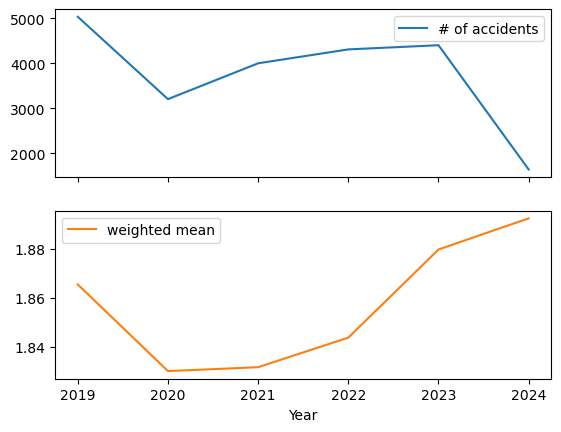

In [147]:
# Let's get a weighted mean col of the # of cars involved per  and then plot
wm_col = (df_year_aggs_drop['# of vehicles']/df_year_aggs_drop['# of accidents']).rename('weighted mean')
df_year_aggs_drop = pd.concat([df_year_aggs_drop,wm_col],axis =1)


In [155]:
df_year_aggs_drop

,# of vehicles,# of accidents,weighted mean
Year,,,
2019,9393,5035,1.865541
2020,5862,3203,1.830159
2021,7327,4000,1.831750
2022,7945,4309,1.843815
2023,8275,4402,1.879827
2024,3100,1638,1.892552


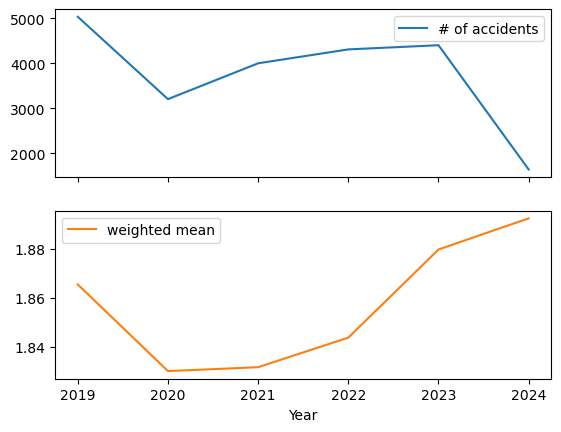

In [152]:
year_aggs_plot =df_year_aggs_drop.filter(items = ['# of accidents','weighted mean']).plot.line(subplots=True) 


In the above charts we see the # of accidents per year and the mean # of cars per accident in Cary from 2019 to 2024.
As might be expected, the # of accidents dropped at the advent of the pandemic but the number of accidents has been climbing but not yet returned to 2019 levels(Keep in mind 2024 is an incomplete year).

The mean # of cars per accident has only a vary slight shift between years, but 2023 has actually surpassed 2019 levels contrary to the # of accidents.

In [170]:
# Now let's see if there is any variation in the # of accidents by month or day grouping across all years excluding 2024 which is incomplete.
df_day_month = df_year_date.loc[df_year_date['Year']!= 2024]
df_day_month = df_day_month.filter(items = ['Month','Weekday','# of Vehicles'])
df_month_agg = df_day_month['Month'].value_counts()
df_day_agg = df_day_month['Weekday'].value_counts()

In [179]:
# value counts doesn't sort the data on the month/day order but on count order.
df_month_agg.sort_index(ascending=True,inplace=True)
df_day_agg.sort_index(ascending=True,inplace=True)

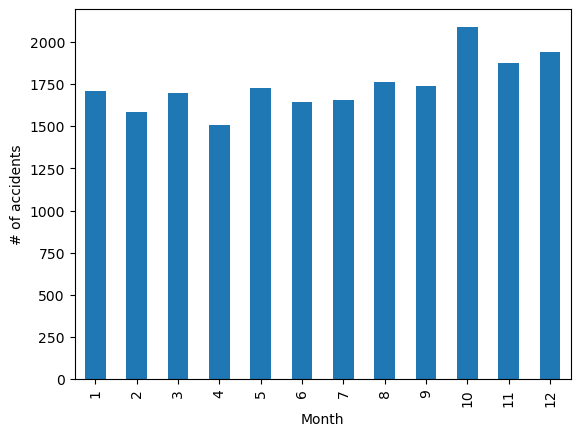

In [184]:
month_plot =df_month_agg.plot.bar(ylabel = '# of accidents')
#day_plot = df_day_agg.plot()

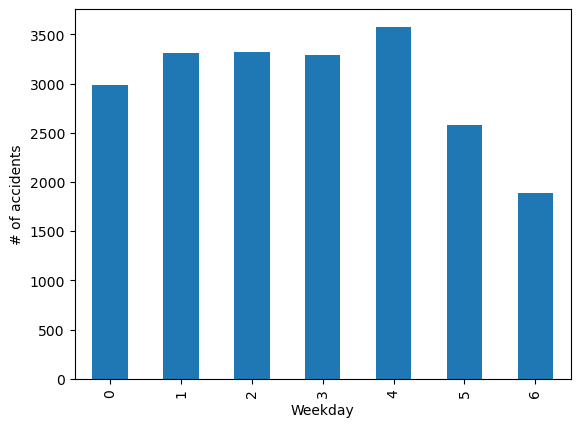

In [185]:
day_plot = df_day_agg.plot.bar(ylabel = '# of accidents')